Прочитайте csv файл (используйте функцию read_csv)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('bestsellers with categories.csv')


Выведите первый пять строчек (используется функцию head)

In [ ]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Выведите размеры датасета (используйте атрибут shape)

In [ ]:
df.shape

(550, 7)

О скольки книгах хранит данные датасет?

Ответ: 550 книг

Сменим регистр на маленький, а пробел заменим на нижнее подчеркивания (snake_style). А заодно и выучим полезный атрибут датафрейма: columns (можно просто присвоить список новых имен этому атрибуту)

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         550 non-null    object 
 1   author       550 non-null    object 
 2   user_rating  550 non-null    float64
 3   reviews      550 non-null    int64  
 4   price        550 non-null    int64  
 5   year         550 non-null    int64  
 6   genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [ ]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

***Візуалізація розподілу цін по роках***

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; y

<AxesSubplot:xlabel='year', ylabel='price'>

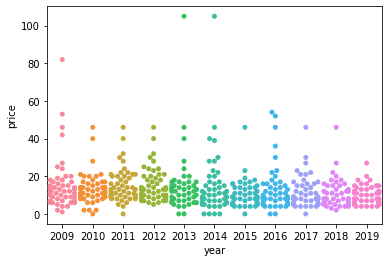

In [ ]:
sns.swarmplot(x='year', y='price', data=df)

***Візуалізація змін рейтингу за жанрами по роках***

<AxesSubplot:xlabel='year', ylabel='user_rating'>

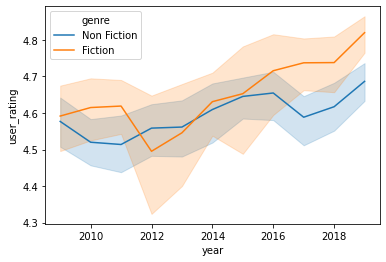

In [ ]:
sns.lineplot(x='year', y='user_rating', hue="genre", data=df)

***Візуалізація рейтенгу по роках та жанрах***

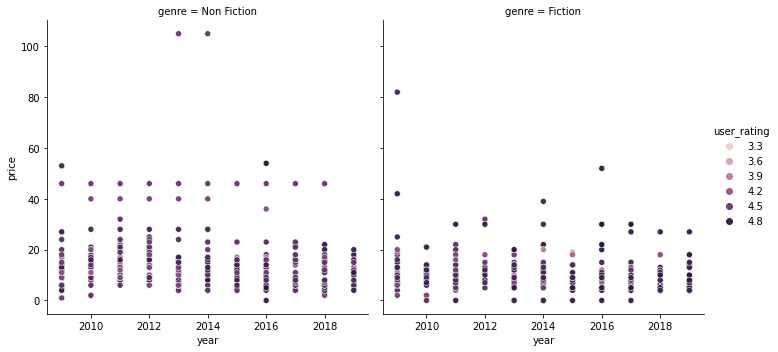

In [ ]:
sns.relplot(x='year', y='price', kind='scatter', hue='user_rating', col='genre', data=df)

Есть ли в каких либо переменных пропуски? (Да/Нет)

Ответ: **Нет**

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры?

Ответ: 'Non Fiction', 'Fiction'

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

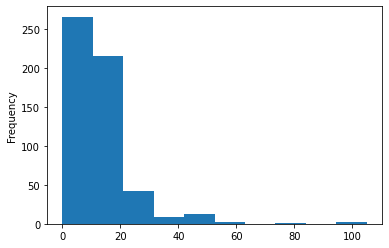

In [ ]:
df["price"].plot(kind = 'hist')

Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

In [ ]:
df["price"].max()


105

In [ ]:
df["price"].min()

0

In [ ]:
df["price"].mean()

13.1

In [ ]:
df["price"].median()

11.0

Mаксимальная цена?

Ответ: 105

Минимальная цена?

Ответ: 0

Средняя цена?

Ответ: 13.1

Медианная цена?

Ответ: 11

Какой рейтинг в датасете наивысший? 

In [ ]:
max_rating = df["user_rating"].max()
max_rating

4.9

Ответ: 4.9

Сколько книг имеют такой рейтинг? 

In [ ]:
books_max_rating = df['user_rating']==max_rating
books_max_rating.sum()
   


52

Ответ: 52

У какой книги больше всего отзывов? 

In [ ]:
max_review = df['reviews'].max()
books_with_max_review = df[(df['reviews']==max_review)]['name']
books_with_max_review

534    Where the Crawdads Sing
Name: name, dtype: object

Ответ: Where the Crawdads Sing

Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)?

In [ ]:
top_50_2015 = df[df.year == 2015]
max_price = top_50_2015['price'].max()
top_50_2015[top_50_2015.price == max_price]


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Ответ: Publication Manual of the American Psychological Association, 6th Edition

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)?

In [ ]:
df.query('year == 2010 & genre == "Fiction"').shape[0]

20

Ответ: 20

Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)?

In [ ]:
df.query('(year == 2010 | year == 2011) & user_rating == 4.9').shape[0]

1

Ответ: 1

И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

In [ ]:
df_for_sorting = df.query('year == 2015 & price <8')
df_for_sorting.sort_values('price', ascending=True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)

Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

Максимальная цена для жанра Fiction: 

In [ ]:
df.groupby(by="genre").agg(['max', 'min'])['price']

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


Ответ: 82

Минимальная цена для жанра Fiction: 0

Максимальная цена для жанра Non Fiction: 105

Минимальная цена для жанра Non Fiction: 0

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [ ]:
author_count = df.groupby(by="author").agg(['count'])
author_count = author_count['name'].copy()
author_count

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Какой размерности вышла таблица? 

In [ ]:
author_count.shape

(248, 1)

Ответ: (248, 1)

У какого автора больше всего книг?

In [ ]:
author_count.sort_values('count', ascending=False).iloc[0:1]


,count
author,
Jeff Kinney,12


Ответ: Jeff Kinney

Сколько книг у этого автора? Ответ: 12

Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

In [ ]:
author_mean_rating = df.groupby(by="author").agg(['mean'])
author_mean_rating=author_mean_rating['user_rating']
author_mean_rating

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У какого автора средний рейтинг минимальный? 

In [ ]:
author_mean_rating.sort_values('mean', ascending=True).iloc[0:1]

,mean
author,
Donna Tartt,3.9


Ответ: Donna Tartt

Какой у этого автора средний рейтинг? Ответ: 3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [ ]:
combine_df = pd.concat([author_count, author_mean_rating], axis=1)
combine_df

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

In [ ]:
combine_df.sort_values(['count', 'mean'], ascending=True)

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Какой автор первый в списке?

In [ ]:
combine_df.sort_values(['count', 'mean'], ascending=True).iloc[0:1]

,count,mean
author,,
Muriel Barbery,1,4.0


Ответ: Muriel Barbery